# First method

Let's try that highlevel routine found in programming pearls. The example was: we want to select 2 numbers from the 1..5 range. I will select 1 with a 2 out of 5 chance. 
Possible outcomes are:

- I selected 1 and now for 2 chances are 1 out of 4
- I didn't select 1 and now for 2 chances are 2 out of 4

In [77]:
def genrandom(m, n):
    "Returns m random numbers from 0..n range."
    needed, remaining_in_list = m, n
    numbers = []
    for i in range(n):
        if bigrand() % remaining_in_list < needed:
            numbers.append(i)
            needed -=1
        remaining_in_list -= 1
    return numbers

In [78]:
genrandom(2, 5)

[0, 4]

We also need to define something like bigrand():

In [79]:
from random import randint
from functools import partial

In [80]:
bigrand = partial(randint, a=0, b=2**32) 

In [81]:
bigrand()

1087683378

Now to some real questions: does this function work correctly?

Let's try to run it a couple of times always with the same input and count the results.

In [82]:
from collections import Counter

c = Counter()
for _ in range(20000):
    numbers = genrandom(2, 5)
    c.update(numbers)

In [83]:
c.most_common()

[(3, 8084), (1, 8040), (0, 7989), (4, 7950), (2, 7937)]

Let's plot the expected result versus the real result from our experiment:

In [84]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

(0, 11000)

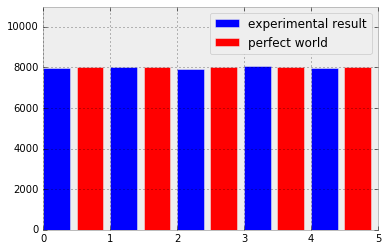

In [100]:
plt.bar(range(5), [c[key] for key in range(5)],  width=0.4, label='experimental result')
plt.bar([_ + 0.5 for _ in range(5)], [20000*2/5 for _ in range(5)], width=0.4, label='perfect world', color='r')
plt.legend()
plt.ylim(0, 11000)

This looks correct. 

In [101]:
genrandom(10, 21)

[0, 2, 4, 6, 7, 9, 11, 13, 14, 19]

# Second method 

The second method is also easy. We build a set of numbers and randomly try to insert a new one.

In [115]:
def genset(m, n):
    "Selects m numbers from 0..n-1."
    numbers = set()
    while len(numbers) < m:
        candidate = bigrand() % n
        numbers.update([candidate])
    return list(numbers)

In [124]:
genset(2, 5)

[1, 3]

Again, let's try to see if the outcome are what we expect:

In [129]:
c = Counter()
for _ in range(20000):
    numbers = genset(2, 5)
    c.update(numbers)

In [130]:
c.most_common()

[(3, 8203), (2, 8024), (4, 7996), (0, 7932), (1, 7845)]

(0, 11000)

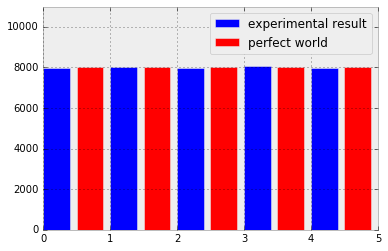

In [128]:
plt.bar(range(5), [c[key] for key in range(5)],  width=0.4, label='experimental result')
plt.bar([_ + 0.5 for _ in range(5)], [20000*2/5 for _ in range(5)], width=0.4, label='perfect world', color='r')
plt.legend()
plt.ylim(0, 11000)

Again, this works nicely. Incidentaly, I would have expected this generation routine not to distribute things evenly.

# Third method 

The third method is also quite clever. We generate a shuffled sequence and take the first m elements. 

In [142]:
from random import shuffle

def genshuffle(m, n):
    "Generates a sequence of m integers in range 1..n."
    return sorted(shuffled(range(n))[:m])

def shuffled(seq):
    "Returns a shuffled version of a sequence."
    copy = list(seq[:])
    shuffle(copy)
    return copy

In [156]:
genshuffle(2, 5)

[0, 1]

Again, let's see if this is distributed in the expected way:

In [157]:
c = Counter()
for _ in range(20000):
    numbers = genshuffle(2, 5)
    c.update(numbers)

In [158]:
c

Counter({0: 8041, 1: 7921, 2: 8026, 3: 8031, 4: 7981})

(0, 11000)

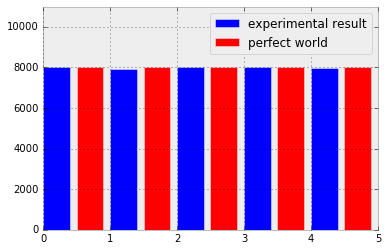

In [159]:
plt.bar(range(5), [c[key] for key in range(5)],  width=0.4, label='experimental result')
plt.bar([_ + 0.5 for _ in range(5)], [20000*2/5 for _ in range(5)], width=0.4, label='perfect world', color='r')
plt.legend()
plt.ylim(0, 11000)

Nice, a third algorithm that works. 

# One that doesn't work 

To finish off this post, we'll use an algorithm that doesn't work. It's taken from Peter Norvig's CS212 class on Udacity.

I'll '